<a href="https://colab.research.google.com/github/abhinavpy/Tensorflow-Keras-Tutorials/blob/master/Keras_Multiclass_Classification_for_Deep_Neural_Networks_with_ROC_and_AUC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

df = pd.read_csv("https://data.heatonresearch.com/data/t81-558/wcbreast_wdbc.csv",
                na_values = ['NA', '?'])

ROC Curves
Binary classification is common in medical testing. Often you want to diagnose if someone has a diesease. This can lead to two type of errors, known as false positive and false negative.
1. False Positive - Your (test) neural network indicated that the patient has disease; however the patient did not have disease.
2. False Negative - Your test neural network indicated that the patient did not have the disease; however the patient did have the disease. 
3.  True Positive - Your neural network indicated that the patient had the disease correctly.
4. True Negative - Your neural network indicated that the patient did not have the disease correctly.

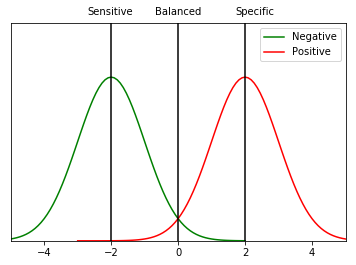

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu1 = -2
mu2 = 2

variance = 1
sigma = math.sqrt(variance)
x1 = np.linspace(mu1 - 5*sigma, mu1 + 4*sigma, 100)
x2 = np.linspace(mu2 - 5*sigma, mu2 + 4*sigma, 100)
plt.plot(x1, stats.norm.pdf(x1, mu1, sigma)/1, color="green")
plt.plot(x2, stats.norm.pdf(x2, mu2, sigma)/1, color="red")
plt.axvline(x=-2, color="black")
plt.axvline(x=0, color="black")
plt.axvline(x=+2, color="black")
plt.text(-2.7, 0.55, "Sensitive")
plt.text(-0.7, 0.55, "Balanced")
plt.text(1.7, 0.55, "Specific")
plt.ylim([0,0.53])
plt.xlim([-5,5])
plt.legend(['Negative', 'Positive'])
plt.yticks([])
plt.show()


In [0]:
from scipy.stats import zscore

# Prepare data - apply zscore to all x columns
# Only do this if you have no categoricals and are sure you want to use zscore 
x_columns = df.columns.drop('diagnosis').drop('id')
for col in x_columns:
  df[col] = zscore(df[col])
  
# Convert to numpy reegression
x = df[x_columns].values
y = df['diagnosis'].map({'M':1,"B":0}) # Binary Classification, M is 1 and B is 0



In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix
# cm is the confusion matrix names are the names of the classes
def plot_confusion_matrix(cm, names, title='confusion_matrix', cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(names))
  plt.xticks(tick_marks, names, rotation=45)
  plt.yticks(tick_marks, names)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  
def plot_roc(pred, y):
  fpr, tpr, _ = roc_curve(y, pred)
  roc_auc = auc(fpr, tpr)
  
  plt.figure()
  plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC)')
  plt.legend(loc="lower right")
  plt.show()

ROC Chart Example


In [0]:
# Classification neural network
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=42)

model = Sequential()
model.add(Dense(100, input_dim=x.shape[1], activation='relu',kernel_initializer='random_normal'))
model.add(Dense(50,activation='relu',kernel_initializer='random_normal'))
model.add(Dense(25,activation='relu',kernel_initializer='random_normal'))
model.add(Dense(1,activation='linear',kernel_initializer='random_normal'))
model.compile(loss='binary_crossentropy', 
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics =['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
    patience=5, verbose=1, mode='auto', restore_best_weights=True)
model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2,epochs=1000)


W0707 17:53:02.902077 139825990412160 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/initializers.py:143: calling RandomNormal.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0707 17:53:03.201915 139825990412160 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 426 samples, validate on 143 samples
Epoch 1/1000
426/426 - 0s - loss: 1.5461 - acc: 0.6291 - val_loss: 0.9387 - val_acc: 0.6224
Epoch 2/1000
426/426 - 0s - loss: 0.7647 - acc: 0.6315 - val_loss: 0.5334 - val_acc: 0.6713
Epoch 3/1000
426/426 - 0s - loss: 0.4293 - acc: 0.7512 - val_loss: 0.2513 - val_acc: 0.8811
Epoch 4/1000
426/426 - 0s - loss: 0.2428 - acc: 0.9155 - val_loss: 0.2289 - val_acc: 0.9510
Epoch 5/1000
426/426 - 0s - loss: 0.1692 - acc: 0.9413 - val_loss: 0.1901 - val_acc: 0.9650
Epoch 6/1000
426/426 - 0s - loss: 0.1058 - acc: 0.9648 - val_loss: 0.0761 - val_acc: 0.9790
Epoch 7/1000
426/426 - 0s - loss: 0.0809 - acc: 0.9765 - val_loss: 0.0657 - val_acc: 0.9930
Epoch 8/1000
426/426 - 0s - loss: 0.0671 - acc: 0.9836 - val_loss: 0.0612 - val_acc: 0.9860
Epoch 9/1000
426/426 - 0s - loss: 0.0585 - acc: 0.9859 - val_loss: 0.0604 - val_acc: 0.9860
Epoch 10/1000
426/426 - 0s - loss: 0.0529 - acc: 0.9859 - val_loss: 0.0612 - val_acc: 0.9860
Epoch 11/1000
426/426 - 0s - loss

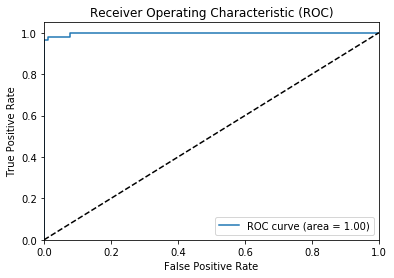

In [0]:
pred = model.predict(x_test)
plot_roc(pred, y_test)

## Multiclass Classification for Error Metrics

The following sections will examine several metrics for evaluating classification error. The following classification neural network will be used to evaluate.

In [0]:
import pandas as pd
from scipy.stats import zscore

# Read the dataset
df = pd.read_csv("https://data.heatonresearch.com/data/t81-558/jh-simple-dataset.csv", na_values=['NA','?'])

# Generate dummies for job
df = pd.concat([df, pd.get_dummies(df['job'], prefix="job")], axis=1)
df.drop('job', axis=1, inplace=True)

# Generate dummies for area
df = pd.concat([df, pd.get_dummies(df['area'], prefix="area")], axis=1)
df.drop('area', axis=1, inplace=True)

# Missing values for income
med = df['income'].median()
df['income'] = df['income'].fillna(med)

# Standardize ranges
df['income'] = zscore(df['income'])
df['aspect'] = zscore(df['aspect'])
df['save_rate'] = zscore(df['save_rate'])
df['age'] = zscore(df['age'])
df['subscriptions'] = zscore(df['subscriptions'])

# Convert to numpy - Classification
x_columns = df.columns.drop('product').drop('id')
x = df[x_columns].values
dummies = pd.get_dummies(df['product'])
products = dummies.columns
y = dummies.values

In [0]:
# Classification Neural Network 
